In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
lenders = pd.read_csv('lenders.csv')
lenders.head()

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,qian3013,Qian,NaN,NaN,NaN,NaN,1461300457,NaN,NaN,NaN,NaN,1.0,NaN,0
1,reena6733,Reena,NaN,NaN,NaN,NaN,1461300634,NaN,NaN,NaN,NaN,9.0,NaN,0
2,mai5982,Mai,NaN,NaN,NaN,NaN,1461300853,NaN,NaN,NaN,NaN,NaN,NaN,0
3,andrew86079135,Andrew,NaN,NaN,NaN,NaN,1461301091,NaN,NaN,NaN,NaN,5.0,Peter Tan,0
4,nguyen6962,Nguyen,NaN,NaN,NaN,NaN,1461301154,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
lenders.isnull().sum()

PERMANENT_NAME             0
DISPLAY_NAME            2768
MAIN_PIC_ID          1590116
CITY                 1619306
STATE                1713481
COUNTRY_CODE         1458635
MEMBER_SINCE               0
PERSONAL_URL         2189805
OCCUPATION           1844514
LOAN_BECAUSE         2174852
OTHER_INFO           2154640
LOAN_PURCHASE_NUM     894281
INVITED_BY           1852349
NUM_INVITED                0
dtype: int64

In [4]:
lenders.isnull().sum()/lenders.shape[0]

PERMANENT_NAME       0.000000
DISPLAY_NAME         0.001178
MAIN_PIC_ID          0.676883
CITY                 0.689309
STATE                0.729397
COUNTRY_CODE         0.620914
MEMBER_SINCE         0.000000
PERSONAL_URL         0.932160
OCCUPATION           0.785176
LOAN_BECAUSE         0.925794
OTHER_INFO           0.917190
LOAN_PURCHASE_NUM    0.380679
INVITED_BY           0.788511
NUM_INVITED          0.000000
dtype: float64

<ul> <b> Key Observations : </b>
    <li> How many loans has each lender funded <b> (38% missing) </b> </li> (null or 0 funded?)
  <li> What country are they from? <b> (62% missing) </b>. It would have been nice to see the flow of capital across countries if we had more data. </li>
  <li>How many people has each lender referred to Kiva? <b> (0% missing) </b> </li>
  <li> Invited by contains the full name of a person who referred the current lender <b> (78% missing)</b> </li>
</ul>

<h3> Next we move on to see which lenders have funded each loan </h3>

In [5]:
ll = pd.read_csv('loans_lenders.csv')

In [6]:
ll.head()

,LOAN_ID,LENDERS
0,483693,"muc888, sam4326, camaran3922, lachheb1865, reb..."
1,483738,"muc888, nora3555, williammanashi, barbara5610,..."
2,485000,"muc888, terrystl, richardandsusan8352, sherri4..."
3,486087,"muc888, james5068, rudi5955, daniel9859, don92..."
4,534428,"muc888, niki3008, teresa9174, mike4896, david7..."


In [7]:
ll['num_lenders']=ll['LENDERS'].str.split(',').apply(len)

In [8]:
ll.head()

,LOAN_ID,LENDERS,num_lenders
0,483693,"muc888, sam4326, camaran3922, lachheb1865, reb...",40
1,483738,"muc888, nora3555, williammanashi, barbara5610,...",15
2,485000,"muc888, terrystl, richardandsusan8352, sherri4...",15
3,486087,"muc888, james5068, rudi5955, daniel9859, don92...",13
4,534428,"muc888, niki3008, teresa9174, mike4896, david7...",19


We now have the total number of lenders for each loan! 

(array([ 35440.,  78594., 121851., 129825., 127073., 108458.,  94743.,
         82799.,  72173.,  62840.,  52798.,  45903.,  40355.,  35947.,
         32293.,  29318.,  26721.,  23747.,  19857.,  15798.,  13052.,
         10877.,   9384.,   8250.,   7515.,   6840.,   5891.,   5140.,
          4715.,   4483.,   4194.,   4002.,   3803.,   3501.,   3214.,
          3209.,   2780.,   2693.,   2514.,   2453.,   2337.,   2280.,
          2196.,   2013.,   1934.,   1876.,   1676.,   1721.,   1532.,
          2166.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

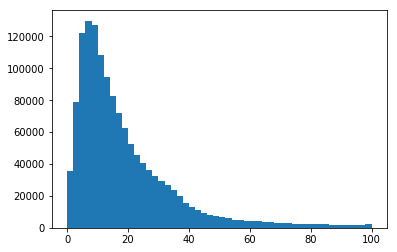

In [9]:
plt.hist(ll['num_lenders'], range = [0, 100], bins=50)

In [10]:
print ("The mean number of lenders per loan is ", ll.num_lenders.mean())
print ("The median number of lenders per loan is ", ll.num_lenders.median())
print ("The max number of lenders per loan is ", ll.num_lenders.max())
print ("The min number of lenders per loan is ", ll.num_lenders.min())

The mean number of lenders per loan is  20.39302178413068
The median number of lenders per loan is  13.0
The max number of lenders per loan is  2888
The min number of lenders per loan is  1


Top 5/10 lenders by country

<h4> Next, we load in the big loans file. This contains loan level details on the borrowers. Their names, description, amount requested, amount funded etc </h4>

In [11]:
chunksize = 100000
chunks = []
for chunk in pd.read_csv('loans.csv', chunksize=chunksize, low_memory=False):
    chunks.append(chunk)
df = pd.concat(chunks, axis=0)

In [12]:
df.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,657307,Aivy,English,"Aivy, 21 years of age, is single and lives in ...",NaN,125.0,125.0,funded,1511246.0,NaN,...,7.0,3,2,1,NaN,Aivy,female,true,irregular,field_partner
1,657259,Idalia Marizza,Spanish,"Doña Idalia, esta casada, tiene 57 años de eda...","Idalia, 57, is married and lives with her husb...",400.0,400.0,funded,1507947.0,NaN,...,8.0,11,2,1,NaN,Idalia Marizza,female,true,monthly,field_partner
2,658010,Aasia,English,Aasia is a 45-year-old married lady and she ha...,NaN,400.0,400.0,funded,1512245.0,NaN,...,14.0,16,2,1,"#Woman Owned Biz, #Supporting Family, user_fav...",Aasia,female,true,monthly,field_partner
3,659347,Gulmira,Russian,"Гулмире 36 лет, замужем, вместе с супругом вос...",Gulmira is 36 years old and married. She and ...,625.0,625.0,funded,1514419.0,NaN,...,14.0,21,2,1,user_favorite,Gulmira,female,true,monthly,field_partner
4,656933,Ricky\t,English,Ricky is a farmer who currently cultivates his...,NaN,425.0,425.0,funded,1506830.0,NaN,...,7.0,15,2,1,"#Animals, #Eco-friendly, #Sustainable Ag",Ricky\t,male,true,bullet,field_partner


In [13]:
lp = df.merge(ll, left_on="LOAN_ID", right_on="LOAN_ID")

In [14]:
lp.isnull().sum()/lp.shape[0]

LOAN_ID                            0.000000
LOAN_NAME                          0.033894
ORIGINAL_LANGUAGE                  0.030805
DESCRIPTION                        0.030828
DESCRIPTION_TRANSLATED             0.325073
FUNDED_AMOUNT                      0.000000
LOAN_AMOUNT                        0.000000
STATUS                             0.000000
IMAGE_ID                           0.030805
VIDEO_ID                           0.999568
ACTIVITY_NAME                      0.000000
SECTOR_NAME                        0.000000
LOAN_USE                           0.030820
COUNTRY_CODE                       0.000006
COUNTRY_NAME                       0.000000
TOWN_NAME                          0.115176
CURRENCY_POLICY                    0.000000
CURRENCY_EXCHANGE_COVERAGE_RATE    0.230156
CURRENCY                           0.000000
PARTNER_ID                         0.011248
POSTED_TIME                        0.000000
PLANNED_EXPIRATION_TIME            0.267206
DISBURSE_TIME                   

In [15]:
'''Make everything lower case '''
lp.columns = [x.lower() for x in lp.columns]


<ul> <b> Key Observations : </b>
    <li> Description translated fields have many missing values. This is likely because they were already written in English and do not need translations <b> (32% missing) </b> </li>
  <li> Planned expiration time <b> (26% missing) </b>.  </li>
  <li> Currency exchange coverage rates <b> (23% missing) </b> </li>
  <li> Tags <b> (54% missing)</b> </li>
</ul>

<h4> Testing to see how many non English entries are missing a translation </h4>

In [16]:
lp_non_eng = lp[lp.original_language != 'English']

In [17]:
lp_non_eng.isnull().sum()/lp_non_eng.shape[0]

loan_id                            0.000000
loan_name                          0.094033
original_language                  0.087905
description                        0.087905
description_translated             0.131955
funded_amount                      0.000000
loan_amount                        0.000000
status                             0.000000
image_id                           0.087905
video_id                           0.999800
activity_name                      0.000000
sector_name                        0.000000
loan_use                           0.087926
country_code                       0.000000
country_name                       0.000000
town_name                          0.195253
currency_policy                    0.000000
currency_exchange_coverage_rate    0.292859
currency                           0.000000
partner_id                         0.000825
posted_time                        0.000000
planned_expiration_time            0.312626
disburse_time                   

<h4>It looks like even for non-English loans, 64k entries are missing a translation. This represents 13% of non-English entries. </h4>

<h3> Conduct some exploratory analysis on the master loans table </h3>

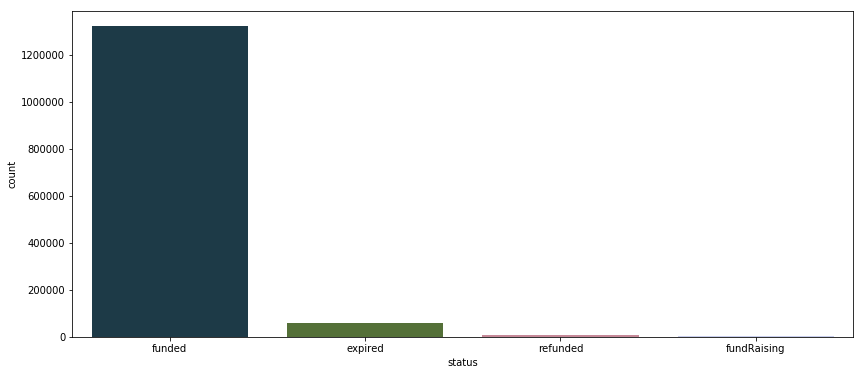

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(x="status", data=lp, palette="cubehelix")

In [19]:
grouped = lp.groupby("status")
grouped.size()

status
expired          57716
fundRaising       2535
funded         1320997
refunded          6180
dtype: int64

In [20]:
lp['num_lenders_total'].value_counts().head(10)

8     63517
9     61445
7     59359
10    58630
5     58039
6     52328
12    51297
11    51214
13    45634
14    44501
Name: num_lenders_total, dtype: int64

In [21]:
lp['num_lenders'].value_counts().head(10)

7     66463
8     65508
5     64184
6     63362
9     61565
4     57666
10    56630
11    51827
12    48839
13    45904
Name: num_lenders, dtype: int64

Isolate rows where these fields are not the same

In [22]:
lp.head(3)

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,image_id,video_id,...,num_journal_entries,num_bulk_entries,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model,lenders,num_lenders
0,657307,Aivy,English,"Aivy, 21 years of age, is single and lives in ...",NaN,125.0,125.0,funded,1511246.0,NaN,...,2,1,NaN,Aivy,female,true,irregular,field_partner,"spencer5657, matthew8640, larry71496105",3
1,657259,Idalia Marizza,Spanish,"Doña Idalia, esta casada, tiene 57 años de eda...","Idalia, 57, is married and lives with her husb...",400.0,400.0,funded,1507947.0,NaN,...,2,1,NaN,Idalia Marizza,female,true,monthly,field_partner,"ltr, andrew5306, dana9865, WHYu, robert9784528...",7
2,658010,Aasia,English,Aasia is a 45-year-old married lady and she ha...,NaN,400.0,400.0,funded,1512245.0,NaN,...,2,1,"#Woman Owned Biz, #Supporting Family, user_fav...",Aasia,female,true,monthly,field_partner,"kathy3100, omar7511, amirali5409, bingo, genie...",14


<h4> There is a discrepancy in our calculated "number of lenders" vs those in the loans table. Technically these should be the same. </h4>

There are certain values here that will not be relevant to our analysis. These include image_id, video_id and town_name. Other variables, such as tags have too many missing values. I will also drop those for now. "Description translated" also has many missing values but I will keep those for now, as there may be some useful text analysis to come out of it in the future. 

In [23]:
lp.drop(['image_id', 'video_id','tags'], axis=1, inplace=True)

<h4> Start by exploring loan amounts </h4>

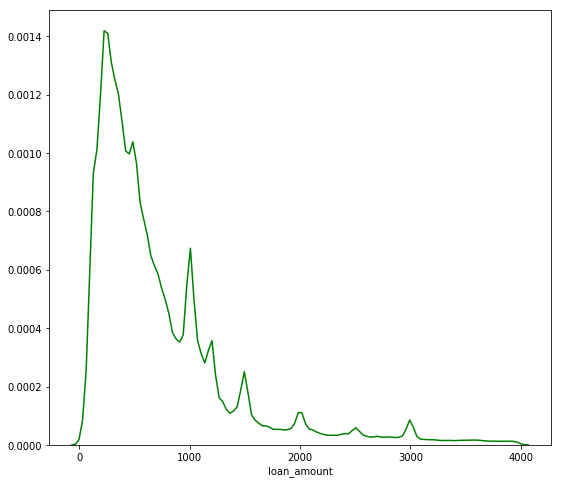

In [24]:
plt.figure(figsize=(9, 8))
sns.distplot(lp['loan_amount'], color='g', bins=100,hist=False, kde_kws={'clip': (0.0, 4000)});

In [25]:
print ("The mean loan amount is", lp.loan_amount.mean())
print ("The max loan amount is", lp.loan_amount.max())
print ("The min loan amount is", lp.loan_amount.min())

The mean loan amount is 838.5547754550146
The max loan amount is 100000.0
The min loan amount is 25.0


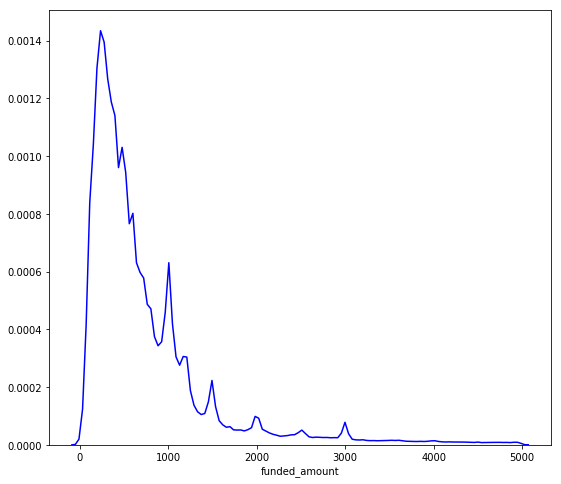

In [26]:
plt.figure(figsize=(9, 8))
sns.distplot(lp['funded_amount'], color='b', bins=100,hist=False, kde_kws={'clip': (0.0, 5000)});

In [27]:
print ("The mean funded loan amount is", lp.funded_amount.mean())
print ("The max funded loan amount is", lp.funded_amount.max())
print ("The min funded loan amount is", lp.funded_amount.min())

The mean funded loan amount is 805.7079898920881
The max funded loan amount is 100000.0
The min funded loan amount is 5.0


The mean funded loan amount is 33 lower than the requested amount. The max loan amount of 100k is funded ! The min funded loan amount of $5 looks like it may be an outlier. The minimum loan amount on Kiva is 25. 

In [28]:
lp.loc[lp['funded_amount'] == 5]

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,activity_name,sector_name,...,num_lenders_total,num_journal_entries,num_bulk_entries,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model,lenders,num_lenders
135956,1089026,Brian,English,"I grew up on the south side of Chicago, IL in ...","I grew up on the south side of Chicago, IL in ...",5.0,5000.0,expired,Construction,Construction,...,1,1,1,Brian,male,true,bullet,direct,josie6558,1
725946,1089253,Treyvon,English,"My name is Treyvon Wilson, I'm a student and s...","My name is Treyvon Wilson, I'm a student and s...",5.0,2950.0,expired,Entertainment,Entertainment,...,1,1,1,Treyvon,male,true,bullet,direct,trey4018,1
1038811,1079636,Marsha,English,I've always had a love of beauty from when i w...,I've always had a love of beauty from when i w...,5.0,5000.0,expired,Services,Services,...,1,1,1,Marsha,female,true,bullet,direct,jonnycprice,1
1190462,1088863,Ivette,English,"I always say, I was made in Puerto Rico and bo...","I always say, I was made in Puerto Rico and bo...",5.0,500.0,expired,Services,Services,...,1,1,1,Ivette,female,true,bullet,direct,kmackay,1


<h4> Ah, these loans are all expired. They did not manage to reach the loan_amount in each row. Still, this seems strange since you have to fund a minimum of 25 on each loan as a lender </h4>

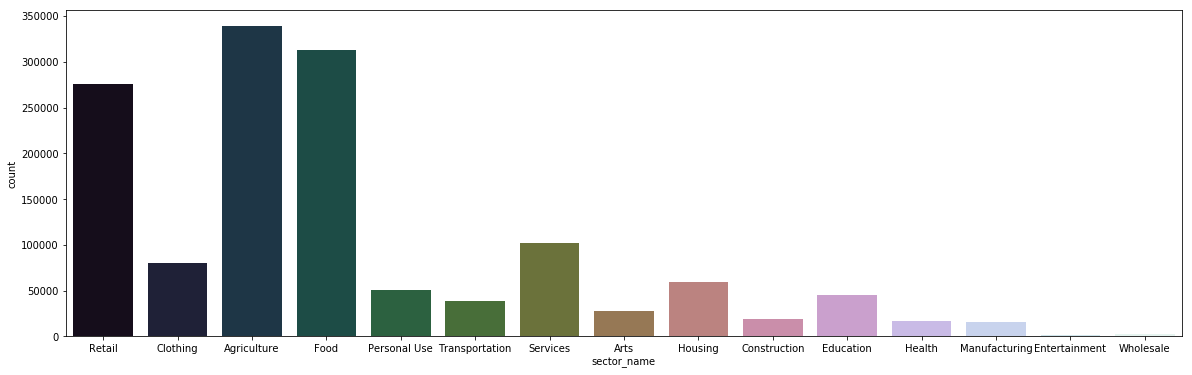

In [33]:
plt.figure(figsize=(20,6))
sns.countplot(x="sector_name", data=lp, palette='cubehelix')

In [30]:
lp.activity_name.value_counts()

Farming                      130849
General Store                117129
Retail                        69322
Food Production/Sales         62960
Agriculture                   58206
Clothing Sales                58171
Personal Housing Expenses     56471
Grocery Store                 41669
Pigs                          41455
Fruits & Vegetables           35810
Higher education costs        28557
Food Market                   26467
Home Appliances               25690
Fish Selling                  25284
Livestock                     24122
Animal Sales                  21212
Services                      20156
Food Stall                    19926
Tailoring                     19863
Food                          18954
Poultry                       17992
Sewing                        17876
Cattle                        17864
Dairy                         16376
Fishing                       15683
Beauty Salon                  15459
Motorcycle Transport          15329
Cereals                     

<h4> Definitely looks like there is a HEAVY correlation between activity types and sectors. Farming and agriculture are the most common loan uses </h4>

In [31]:
lp.groupby('sector_name')['loan_amount'].mean().sort_values()

sector_name
Personal Use       456.080922
Housing            745.347832
Transportation     746.514576
Agriculture        801.842673
Retail             812.144578
Food               832.486518
Manufacturing      868.704450
Arts               935.902003
Construction       952.787452
Education          991.154439
Services          1008.922389
Clothing          1029.444078
Health            1043.933476
Entertainment     1301.755894
Wholesale         1326.607143
Name: loan_amount, dtype: float64

In [32]:
lp.groupby('sector_name')['funded_amount'].mean().sort_values()

sector_name
Personal Use       435.138310
Housing            688.967416
Transportation     702.060567
Agriculture        769.086679
Retail             778.281295
Food               806.982179
Manufacturing      865.140327
Arts               925.748064
Construction       929.887216
Services           959.163503
Education          971.183521
Clothing           989.127617
Health            1001.380836
Entertainment     1183.914538
Wholesale         1289.321429
Name: funded_amount, dtype: float64

In [65]:
group_by_sector = lp.groupby(['sector_name','status'])

In [ ]:
group_by_sector.size()

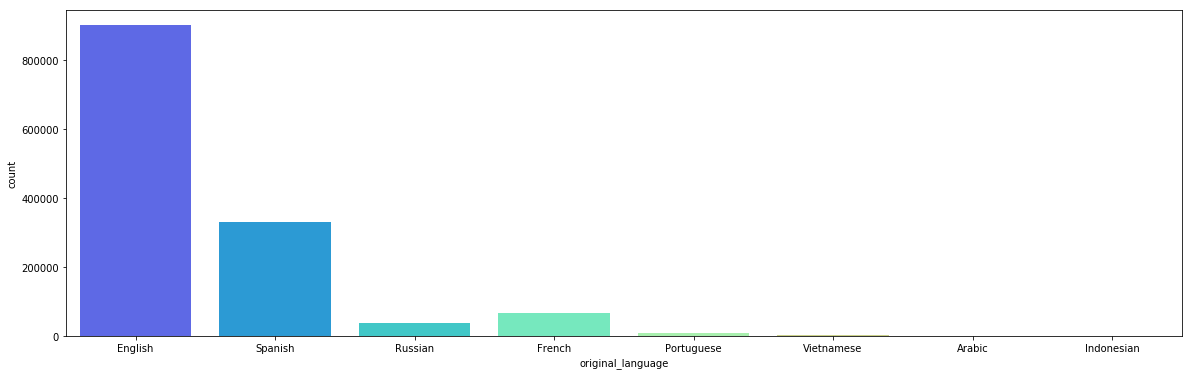

In [34]:
plt.figure(figsize=(20,6))
sns.countplot(x="original_language", data=lp, palette='rainbow')

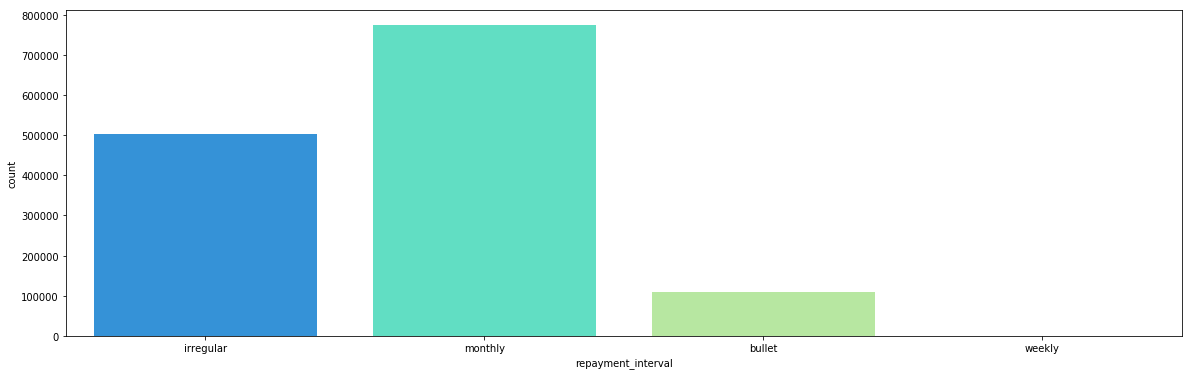

In [35]:
plt.figure(figsize=(20,6))
sns.countplot(x="repayment_interval", data=lp, palette='rainbow')

In [36]:
lp.country_name.value_counts()

Philippines                         260541
Kenya                               142817
Peru                                 83961
Cambodia                             79481
El Salvador                          63754
Uganda                               45691
Pakistan                             44763
Tajikistan                           43716
Nicaragua                            42403
Colombia                             33512
Ecuador                              33347
Bolivia                              25199
Paraguay                             24520
Ghana                                22070
Vietnam                              21804
Lebanon                              20009
Nigeria                              19834
Mexico                               19660
Togo                                 17035
Rwanda                               16725
Samoa                                16390
Tanzania                             16038
Sierra Leone                         15554
Honduras   

<h4> Very interesting how Phillipines makes up majority of this sample! </h4>

In [37]:
lp.borrower_genders.value_counts()

female                                                                                                                                                                                                                                                                                                                847424
male                                                                                                                                                                                                                                                                                                                  297023
female, female, female                                                                                                                                                                                                                                                                                                 21607
female, female                                   

<h4> werid data due to group loans! </h4>


In [38]:
def score_to_numeric(x):
    if x=='funded':
        return 1
    if x=='expired':
        return 0
    if x=='refunded':
        return 0
    if x=='fundRaising':
        return 0

In [39]:
lp['status_num'] = lp['status'].apply(score_to_numeric)

In [40]:
lp['funding_rate'] = lp['status_num']/lp['status_num'].sum()

In [42]:

group_by_sector  = lp.groupby(['sector_name']).agg({'status_num': 'sum', 'loan_id': 'count'})

In [43]:
group_by_sector['funding_rate'] = group_by_sector['status_num']/group_by_sector['loan_id']

In [44]:
group_by_sector

,status_num,loan_id,funding_rate
sector_name,,,
Agriculture,321884,339344,0.948548
Arts,27279,27511,0.991567
Clothing,75812,80326,0.943804
Construction,18094,18664,0.969460
Education,44428,45390,0.978806
Entertainment,1951,2036,0.958251
Food,301959,313390,0.963525
Health,15612,16385,0.952823
Housing,53756,59569,0.902416


In [45]:
# Avg loan amount by sector
lp.pivot_table(columns=['sector_name'], values='loan_amount')

sector_name,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale
loan_amount,801.842673,935.902003,1029.444078,952.787452,991.154439,1301.755894,832.486518,1043.933476,745.347832,868.70445,456.080922,812.144578,1008.922389,746.514576,1326.607143


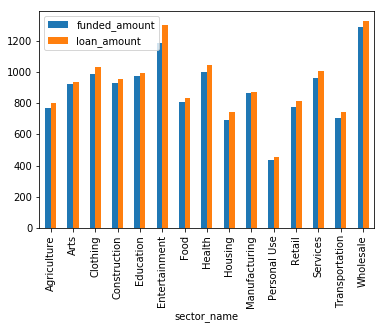

In [46]:
# Avg loan and funded amount by sector
lp.pivot_table(index=['sector_name'], values=['loan_amount', 'funded_amount']).plot(kind= 'bar')

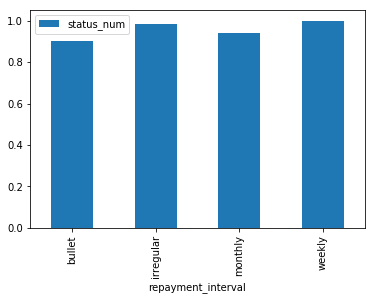

In [47]:
# Avg funding rate by repayment interval
lp.pivot_table(index=['repayment_interval'], values=['status_num']).plot(kind= 'bar')

In [48]:
lp.pivot_table(index=['country_name'], values=['status_num']).sort_values(by=['status_num'], ascending=False)

,status_num
country_name,
Papua New Guinea,1.000000
Saint Vincent and the Grenadines,1.000000
Lesotho,1.000000
Mauritania,1.000000
Namibia,1.000000
Canada,1.000000
Botswana,1.000000
Lao People's Democratic Republic,1.000000
Somalia,1.000000


In [49]:
pd.options.display.max_columns = 999

In [50]:
lp['posted_time'] = pd.to_datetime(lp['posted_time'], errors='coerce')

In [51]:
lp['raised_time'] = pd.to_datetime(lp['raised_time'], errors='coerce')

In [52]:
lp['post_to_raise_days'] = (lp['raised_time']-lp['posted_time'])

In [53]:
lp['post_to_raise_days'] = lp['post_to_raise_days'].dt.days

/Users/arushi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/arushi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([101108.,  91595.,  87913.,  88911.,  86718.,  84116.,  72994.,
         59307.,  51815.,  44046.,  38742.,  32718.,  29964.,  27656.,
         24321.,  21242.,  18663.,  17781.,  17104.,  16587.,  16337.,
         15865.,  14556.,  13608.,  13191.,  13390.,  13822.,  14741.,
         16336.,  37354.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

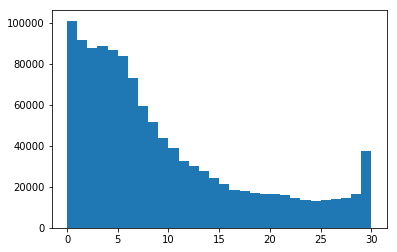

In [54]:
plt.hist(lp['post_to_raise_days'], range = [0, 30], bins=30)

This is so cool! A lot of loans fund within the same day or on the last day.


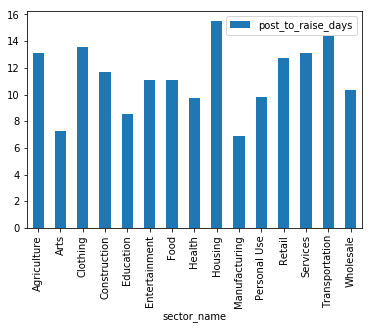

In [55]:
# Avg funding time by sector
lp.pivot_table(index=['sector_name'], values=['post_to_raise_days']).plot(kind= 'bar')

Arts, manufacting and education loans are the quickest to fund

In [56]:
lp.corr()

,loan_id,funded_amount,loan_amount,currency_exchange_coverage_rate,partner_id,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,num_lenders,status_num,funding_rate,post_to_raise_days
loan_id,1.000000,0.000483,0.020481,-0.676424,0.462127,0.094400,-0.060428,-0.215458,-0.127515,-0.075690,-0.103926,-0.103926,0.157323
funded_amount,0.000483,1.000000,0.969797,-0.012257,-0.065575,0.157252,0.879666,0.050196,0.043586,0.874155,0.012481,0.012481,0.153962
loan_amount,0.020481,0.969797,1.000000,-0.024867,-0.057218,0.182950,0.848706,0.033195,0.033637,0.844189,-0.123647,-0.123647,0.153962
currency_exchange_coverage_rate,-0.676424,-0.012257,-0.024867,1.000000,-0.260379,-0.109177,0.031934,0.073820,0.022367,0.042484,0.082571,0.082571,-0.152459
partner_id,0.462127,-0.065575,-0.057218,-0.260379,1.000000,0.114650,-0.039630,-0.052056,-0.023276,-0.044672,-0.030027,-0.030027,0.049447
lender_term,0.094400,0.157252,0.182950,-0.109177,0.114650,1.000000,0.204326,0.058118,0.143267,0.198753,-0.140487,-0.140487,0.143366
num_lenders_total,-0.060428,0.879666,0.848706,0.031934,-0.039630,0.204326,1.000000,0.072966,0.062655,0.994707,0.034583,0.034583,0.176323
num_journal_entries,-0.215458,0.050196,0.033195,0.073820,-0.052056,0.058118,0.072966,1.000000,0.871869,0.075338,0.100096,0.100096,-0.035539
num_bulk_entries,-0.127515,0.043586,0.033637,0.022367,-0.023276,0.143267,0.062655,0.871869,1.000000,0.064337,0.057594,0.057594,-0.012257
num_lenders,-0.075690,0.874155,0.844189,0.042484,-0.044672,0.198753,0.994707,0.075338,0.064337,1.000000,0.027277,0.027277,0.172602


In [68]:
lpcorr = lp.copy()

In [69]:
lpcorr.drop(['loan_id','num_lenders'], axis=1, inplace=True)

In [70]:
lpcorr.corr()

,funded_amount,loan_amount,currency_exchange_coverage_rate,partner_id,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,status_num,funding_rate,post_to_raise_days
funded_amount,1.000000,0.969797,-0.012257,-0.065575,0.157252,0.879666,0.050196,0.043586,0.012481,0.012481,0.153962
loan_amount,0.969797,1.000000,-0.024867,-0.057218,0.182950,0.848706,0.033195,0.033637,-0.123647,-0.123647,0.153962
currency_exchange_coverage_rate,-0.012257,-0.024867,1.000000,-0.260379,-0.109177,0.031934,0.073820,0.022367,0.082571,0.082571,-0.152459
partner_id,-0.065575,-0.057218,-0.260379,1.000000,0.114650,-0.039630,-0.052056,-0.023276,-0.030027,-0.030027,0.049447
lender_term,0.157252,0.182950,-0.109177,0.114650,1.000000,0.204326,0.058118,0.143267,-0.140487,-0.140487,0.143366
num_lenders_total,0.879666,0.848706,0.031934,-0.039630,0.204326,1.000000,0.072966,0.062655,0.034583,0.034583,0.176323
num_journal_entries,0.050196,0.033195,0.073820,-0.052056,0.058118,0.072966,1.000000,0.871869,0.100096,0.100096,-0.035539
num_bulk_entries,0.043586,0.033637,0.022367,-0.023276,0.143267,0.062655,0.871869,1.000000,0.057594,0.057594,-0.012257
status_num,0.012481,-0.123647,0.082571,-0.030027,-0.140487,0.034583,0.100096,0.057594,1.000000,1.000000,-0.000795
funding_rate,0.012481,-0.123647,0.082571,-0.030027,-0.140487,0.034583,0.100096,0.057594,1.000000,1.000000,-0.000795


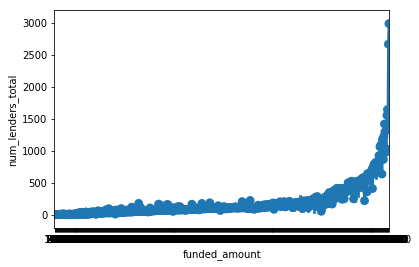

In [71]:
ax = sns.pointplot(x="funded_amount", y="num_lenders_total", data=lp)

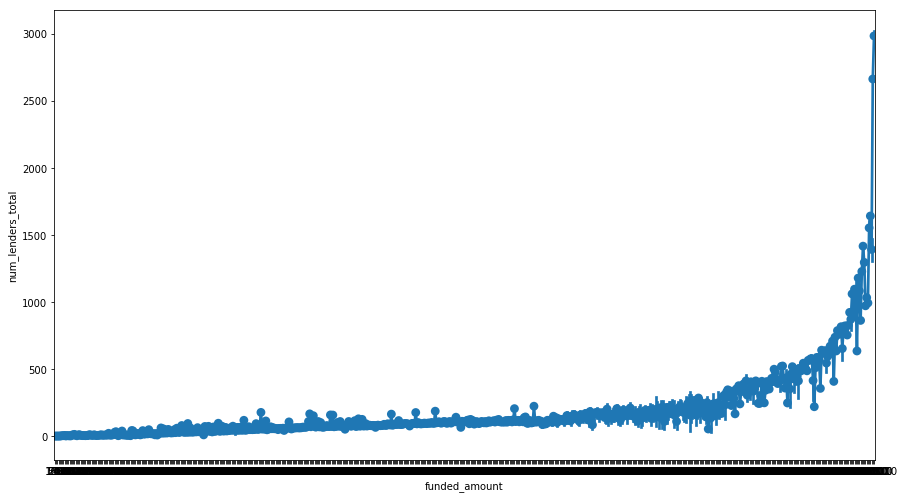

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
ax = sns.pointplot(x="funded_amount", y="num_lenders_total", data=lp)

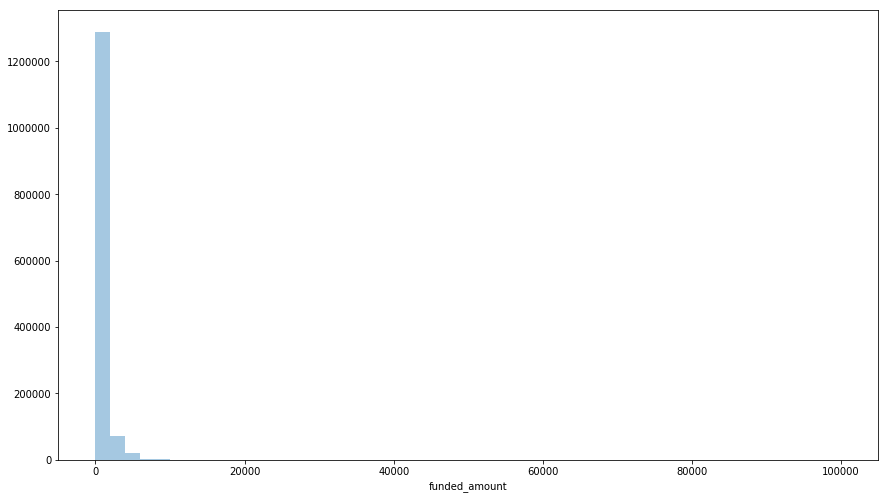

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
sns.distplot(lp['funded_amount'], bins=50, kde=False)

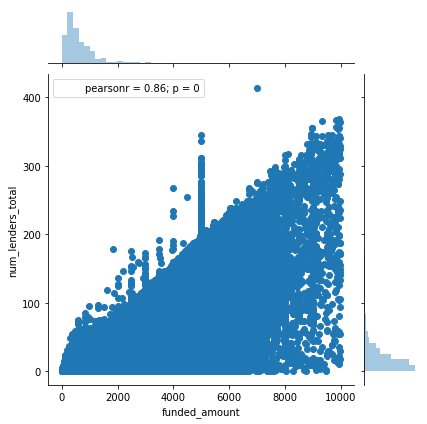

In [87]:
sns.jointplot(x="funded_amount", y="num_lenders_total", data=lp[lp["funded_amount"] < 10000])

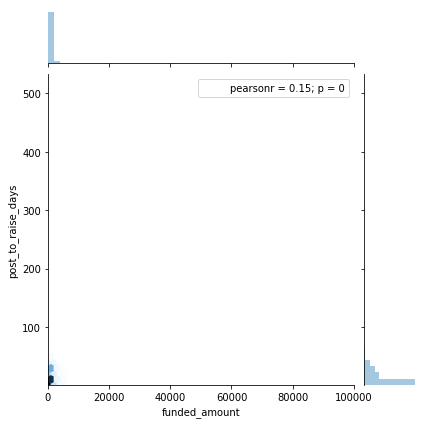

In [90]:
sns.jointplot(x="funded_amount", y="post_to_raise_days", kind='hex', data=lp[lp["post_to_raise_days"] > 0])

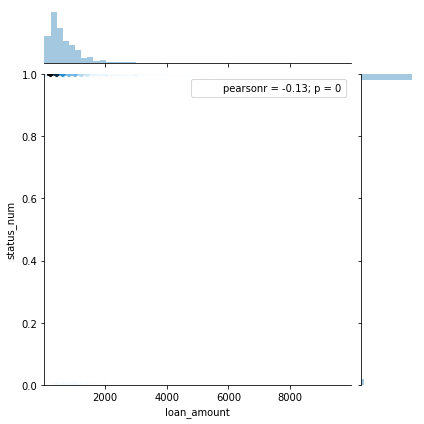

In [94]:
sns.jointplot(x="loan_amount", y="status_num", kind='hex', data=lp[lp["loan_amount"] < 10000])

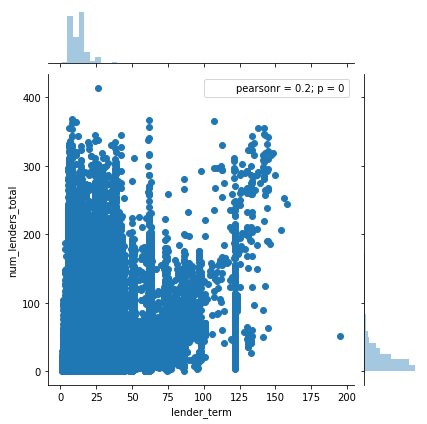

In [95]:
sns.jointplot(x="lender_term", y="num_lenders_total", data=lp[lp["funded_amount"] < 10000])

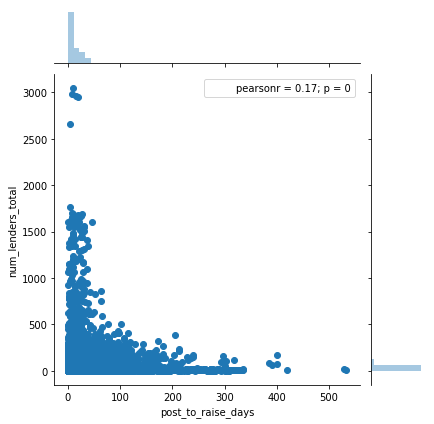

In [96]:
sns.jointplot(x="post_to_raise_days", y="num_lenders_total", data=lp[lp["post_to_raise_days"] >0])

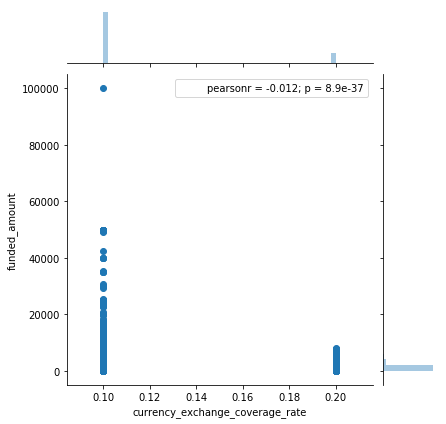

In [98]:
sns.jointplot(x="currency_exchange_coverage_rate", y="funded_amount", data=lp)

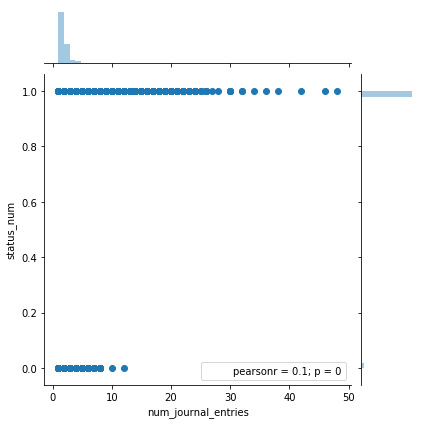

In [101]:
sns.jointplot(x="num_journal_entries", y="status_num", data=lp)

/ regression, SVM, random forest